In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import normalvariate
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import shapiro
from scipy.optimize import minimize
import csv
from scipy.stats import f
from scipy.stats import t
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KernelDensity
import pylab
import random

In [3]:
def law_fun(x):
    return 1.5*x - 2 - 1 / (2 * x)

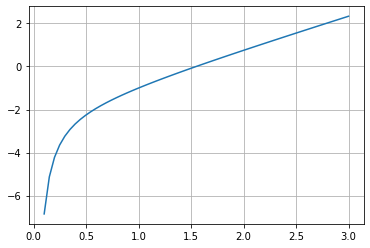

In [174]:
left_bound = 0.1
right_bound = 2.0
sigma = 1.0
alpha_005 = 0.05
alpha_001 = 0.01
alpha_0005 = 0.005

h_law = np.linspace(left_bound, right_bound + 1.0, sample_size)
y_law = [law_fun(x) for x in h_law]

plt.plot(h_law, y_law, '-')
plt.grid()
plt.show()

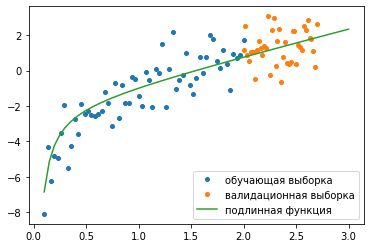

In [40]:
sample_size = 60
h_data = np.linspace(left_bound, right_bound, sample_size)
y_data = np.array([law_fun(i) + normalvariate(0, sigma) for i in h_data])

test_sample_size = 40
shift = right_bound - left_bound
h_data_test = np.linspace(left_bound + shift, right_bound + 0.7, test_sample_size)
y_data_test = np.array([law_fun(i) + normalvariate(0, sigma) for i in h_data_test])

plt.plot(h_data, y_data, 'o', label='обучающая выборка', markersize=4)
plt.plot(h_data_test, y_data_test, 'o', label='валидационная выборка', markersize=4)
plt.plot(h_law, y_law, '-', label='подлинная функция')
plt.legend()
plt.show()

In [385]:
df = open('data.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x-1', 'x', 'x2', 'x3', 'x4', 'x5', 'y']])
    for i in range(len(h_data)):
        writer.writerows([[
            str(1.0),
            str(h_data[i]**(-1)),
            str(h_data[i]),
            str(h_data[i]**2),
            str(h_data[i]**3),
            str(h_data[i]**4),
            str(h_data[i]**5),
            str(y_data[i])]])

In [386]:
df = open('data_test.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x-1', 'x', 'x2', 'x3', 'x4', 'x5', 'y']])
    for i in range(len(h_data_test)):
        writer.writerows([[
            str(1.0),
            str(h_data_test[i]**(-1)),
            str(h_data_test[i]),
            str(h_data_test[i]**2),
            str(h_data_test[i]**3),
            str(h_data_test[i]**4),
            str(h_data_test[i]**5),
            str(y_data_test[i])]])

In [595]:
df = pd.read_csv('data.csv')
y_data = df['y']
X = df[['intercept', 'x-1', 'x','x2','x3','x4','x5']]
X1 = df[['intercept', 'x']]
X2 = df[['intercept', 'x-1','x','x2']]
X3 = df[['intercept', 'x-1','x','x2']]
X4 = df[['intercept', 'x-1','x','x2','x3']]
X5 = df[['intercept', 'x-1','x','x2','x3','x4']]
X6 = df[['intercept', 'x-1','x','x2','x3','x4','x5']]

In [596]:
df_test = pd.read_csv('data_test.csv')
y_data_test = df_test['y']
X_test = df_test[['intercept', 'x-1', 'x','x2','x3','x4','x5']]
X1_test = df_test[['intercept', 'x']]
X2_test = df_test[['intercept', 'x-1', 'x','x2']]
X3_test = df_test[['intercept', 'x-1', 'x','x2']]
X4_test = df_test[['intercept', 'x-1', 'x','x2','x3']]
X5_test = df_test[['intercept', 'x-1', 'x','x2','x3','x4']]
X6_test = df_test[['intercept', 'x-1', 'x','x2','x3','x4','x5']]

In [388]:
X

,intercept,x-1,x,x2,x3,x4,x5
0,1.0,10.000000,0.100000,0.010000,0.001000,0.000100,0.000010
1,1.0,7.564103,0.132203,0.017478,0.002311,0.000305,0.000040
2,1.0,6.082474,0.164407,0.027030,0.004444,0.000731,0.000120
3,1.0,5.086207,0.196610,0.038656,0.007600,0.001494,0.000294
4,1.0,4.370370,0.228814,0.052356,0.011980,0.002741,0.000627
5,1.0,3.831169,0.261017,0.068130,0.017783,0.004642,0.001212
6,1.0,3.410405,0.293220,0.085978,0.025211,0.007392,0.002168
7,1.0,3.072917,0.325424,0.105901,0.034463,0.011215,0.003650
8,1.0,2.796209,0.357627,0.127897,0.045739,0.016358,0.005850
9,1.0,2.565217,0.389831,0.151968,0.059242,0.023094,0.009003


In [678]:
def sum_loss(w):
    X = X1.transpose()
    return sum([np.abs(y_data[i] - np.dot(X[i],w)) for i in range(len(y_data))])

def lr(X, X_test, model_name, show_method_min_module=False, y_data=y_data, y_data_test=y_data_test, X1=X2):
    model = LinearRegression(fit_intercept=False).fit(X, y_data)
    
    n, k = len(y_data), len(X.transpose())
    print('n =',n)
    print('k =',k)
    
    coeffs = model.coef_
    print('coeffs:', coeffs)
    
    R2 = model.score(X, y_data)
    print('R^2 =', R2)
    
    errors = y_data - model.predict(X)
    RMSE = np.sqrt((errors**2).sum() / len(y_data))
    print('RMSE =', RMSE)
    
    sigma_hat_2 = (errors**2).sum() / (len(y_data) - len(X.transpose()) - 1)
    HH = np.dot(np.matrix(X).transpose(), np.matrix(X))
    HH_inv = np.linalg.inv(HH)
    
    VIF = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    print('VIF:\n', VIF)
    multicol = False
    for vif in VIF:
        if vif > max(10, 1/(1 + R2)):
            multicol = True
    if multicol:
        print('Матрица H^T * H мультиколлинеарна')
    else:
        print('Матрица H^T * H не мультиколлинеарна')
    
    K_hat = sigma_hat_2 * HH_inv
    print('оценка ковариационной матрицы K:\n', K_hat)
    print('след ковариационной матрицы tr =', np.matrix.trace(K_hat))
    
    A = np.array(len(coeffs)*[1]).transpose()
    mid = np.linalg.inv(np.dot(np.dot(A.reshape(1, len(coeffs)), HH_inv), A.reshape(len(coeffs), 1)))
    num = np.dot(np.dot(coeffs.reshape(1,len(coeffs)), coeffs.reshape(len(coeffs),1)), mid)
    den = len(coeffs) / (n - k) * errors.sum()
    f_stat = num / den
    f_cv_1 = f.ppf([1 - alpha_005] , len(coeffs), n - k)
    f_cv_2 = f.ppf([1 - alpha_001] , len(coeffs), n - k)
    f_cv_3 = f.ppf([1 - alpha_0005] , len(coeffs), n - k)
    if f_stat < f_cv_3:
        print('гипотеза H_0: theta_i=0 принилась на уровне alpha =', alpha_0005)
    elif f_stat < f_cv_2:
        print('гипотеза H_0: theta_i=0 принилась на уровне alpha =', alpha_001)
    elif f_stat < f_cv_1:
        print('гипотеза H_0: theta_i=0 принилась на уровне alpha =', alpha_005)
    else:
        print('гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha =', alpha_005)
    
    A = (len(coeffs)-1)*[0]
    A.append(1)
    A = np.array(A).transpose()
#     A = np.array(((len(coeffs) - 1)*[0]).append(1)).transpose()
    print('A=', A)
    mid = np.linalg.inv(np.dot(np.dot(A.reshape(1, len(coeffs)), HH_inv), A.reshape(len(coeffs), 1)))
    num = np.dot(np.dot(coeffs.reshape(1,len(coeffs)), coeffs.reshape(len(coeffs),1)), mid)
    den = len(coeffs) / (n - k) * errors.sum()
    f_stat = num / den
    f_cv_1 = f.ppf([1 - alpha_005] , len(coeffs), n - k)
    f_cv_2 = f.ppf([1 - alpha_001] , len(coeffs), n - k)
    f_cv_3 = f.ppf([1 - alpha_0005] , len(coeffs), n - k)
    if f_stat < f_cv_3:
        print('гипотеза H_0: theta_n=0 принилась на уровне alpha =', alpha_0005)
    elif f_stat < f_cv_2:
        print('гипотеза H_0: theta_n=0 принилась на уровне alpha =', alpha_001)
    elif f_stat < f_cv_1:
        print('гипотеза H_0: theta_n=0 принилась на уровне alpha =', alpha_005)
    else:
        print('гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha =', alpha_005)
    
    plt.figure(figsize=(16, 16), dpi=100)
    plt.grid()
    plt.plot(X1['x'], y_data, 'o', label='обучающая выборка', markersize=4)
    plt.plot(X_test['x'], y_data_test, 'o', label='валидационная выборка', markersize=4)
    plt.plot(X1['x'], model.intercept_ + np.dot(X, model.coef_), 'r', label=model_name)
    plt.plot(h_law, y_law, 'k-', label='подлинная функция')
    
    if show_method_min_module:
        model_min_module = minimize(sum_loss, [-4,3])
        plt.plot(X1['x'], np.dot(X1, model_min_module.x), 'y', label='метод наименьших модулей')
        print('min modules coeffs:', model_min_module.x)
        print('Сумма квадратов отклонений на тестовой выборке (МНМ):', ((y_data_test - np.dot(X_test,model_min_module.x))**2).sum())
    if multicol:
        model_ridge = Ridge(alpha=0.3).fit(X, y_data)
        plt.plot(X1['x'], model_ridge.intercept_ + np.dot(X, model_ridge.coef_), 'g', label=model_name + '(ридж-оценка)')
        print('Сумма квадратов отклонений на обучающей выборке (ridge):', ((y_data - model_ridge.predict(X))**2).sum())
    print('Сумма квадратов отклонений на обучающей выборке:', ((y_data - model.predict(X))**2).sum())
    print('Сумма квадратов отклонений на тестовой выборке:', ((y_data_test - model.predict(X_test))**2).sum())
    plt.legend()
    plt.show()
    
    return coeffs, errors, sigma_hat_2

n = 60
k = 2
coeffs: [-4.64430474  3.17641122]
R^2 = 0.7110332313745995
RMSE = 1.1293215401364054
VIF:
 [4.544661913627899, 0.9999999999999998]
Матрица H^T * H не мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 0.10168618 -0.07553459]
 [-0.07553459  0.07193771]]
след ковариационной матрицы tr = [[0.17362389]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
A= [0 1]
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
min modules coeffs: [-4.12597722  2.69599383]
Сумма квадратов отклонений на тестовой выборке (МНМ): 69.49142871583636
Сумма квадратов отклонений на обучающей выборке: 76.52202846096377
Сумма квадратов отклонений на тестовой выборке: 130.32389420480953


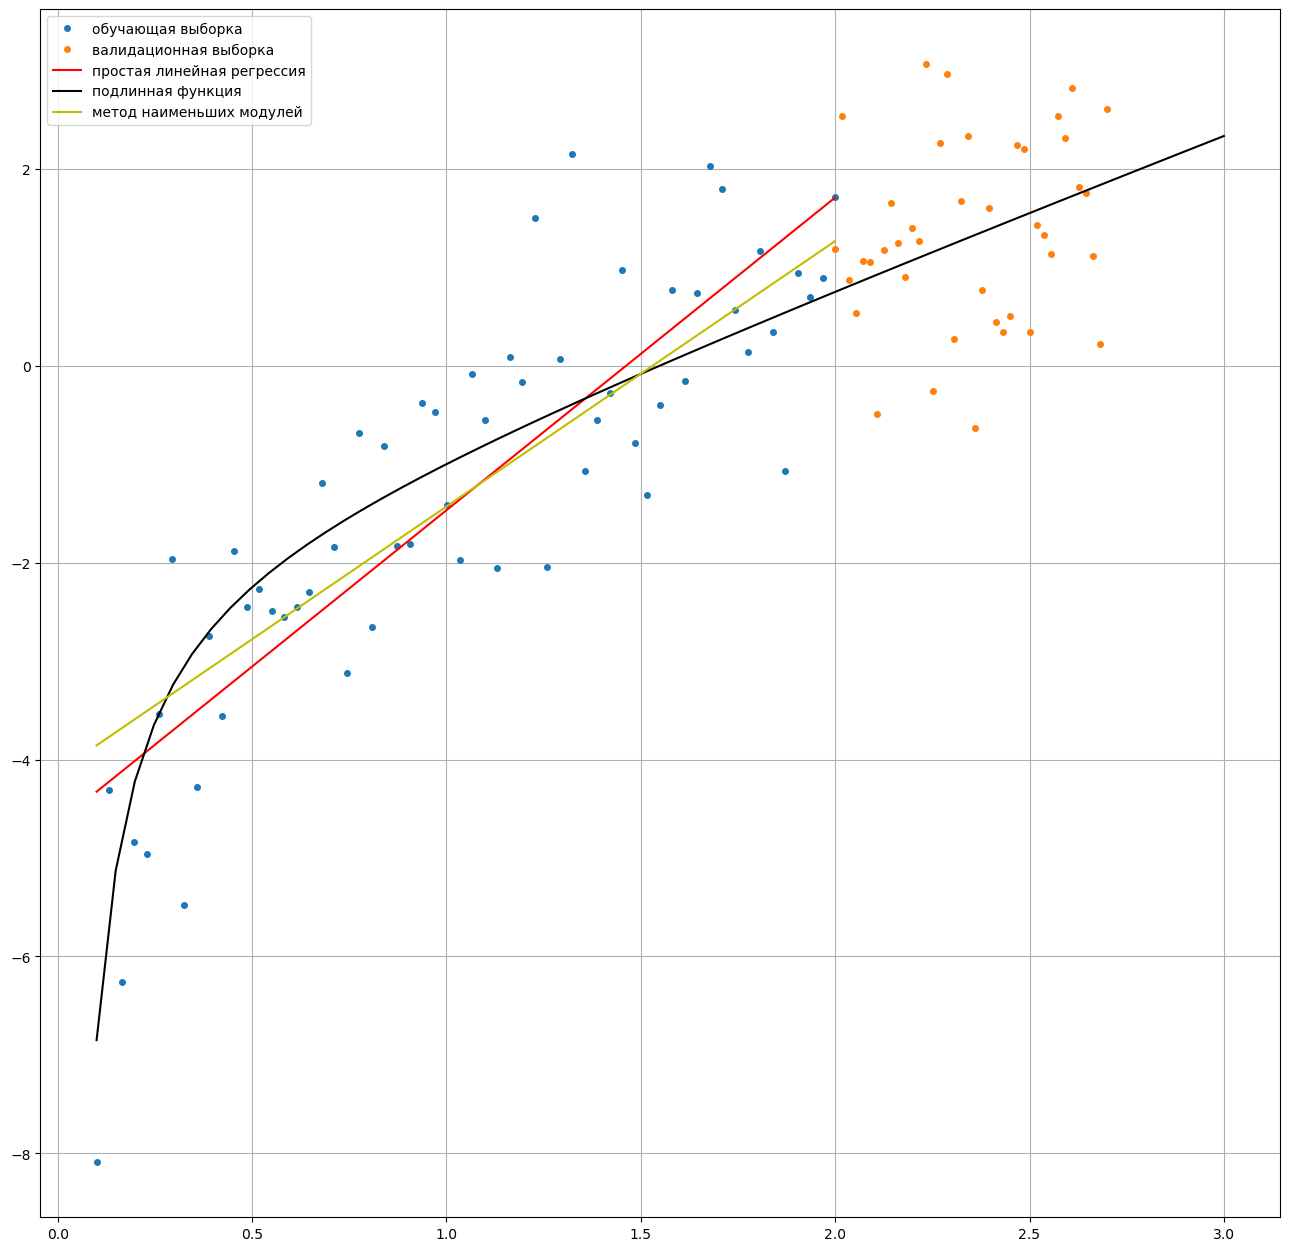

log_likehood = -93.9721335508396
AIC = 0.3611940519519745
AIC_c = 0.5717203677414482
BIC = 196.1329562261234


In [563]:
coeffs, errors, sigma_hat_2 = lr(X1, X1_test, 'простая линейная регрессия', show_method_min_module=True)
log_likehood = -len(y_data) / 2.0 * (1 + np.log(2 * np.pi) + np.log(sigma_hat_2))
k = 2
AIC = 2 * k / len(y_data) + np.log(sigma_hat_2)
AIC_c = AIC + 2 * k * (k + 1) / (len(y_data) - k - 1)
BIC = k * np.log(len(y_data)) - 2 * log_likehood
print('log_likehood =', log_likehood)
print('AIC =', AIC)
print('AIC_c =', AIC_c)
print('BIC =', BIC)
# conf_int = t.interval(0.8, df=len(y_data)-2, loc=coeffs[0], scale=coeffs[1])
# print(conf_int)
# plt.plot(conf_int[0], conf_int[1])

In [493]:
def errors_test(X, errors, dl, du):
    plt.hist(errors)
    plt.show()

    shapiro_test = shapiro(errors)
    print('Критерий Шапиро-Уилка')
    print('statistic =', shapiro_test[0],'pvalue =', shapiro_test[1])
    if shapiro_test[1] < 0.05:
        print('распределение ошибок нормальное на уровне значимости 0.05')
    else:
        print('гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять')

    print()
    
    durbin_watson_test = durbin_watson(errors)
    print('значение статистики Дарбина-Уотсона:', durbin_watson_test)
    print('выборочный коэффициент корреляции r =', 1 - durbin_watson_test/2)
    if 0 < durbin_watson_test < dl_60_2:
        print('гопотеза о некоррелированности отвергается')
    elif dl_60_2 < durbin_watson_test < du_60_2:
        print('гопотеза о некоррелированности не пренимается и не отвергается')
    elif du_60_2 < durbin_watson_test < 4 - du_60_2:
        print('гопотеза о некоррелированности принимается')
    elif 4 - du_60_2 < durbin_watson_test < 4 - dl_60_2:
        print('гопотеза о некоррелированности не пренимается и не отвергается')
    else:
        print('гопотеза о некоррелированности отвергается')
        
    print()
    
    het_breuschpagan_test = het_breuschpagan(errors, X)
    print('значение f-статистики Бройша-Пагана', het_breuschpagan_test)
    if het_breuschpagan_test[3] < 0.05:
        print('гипотеза о гетероскедостичности отвергается на уровне значимости 0.05')
    else:
        print('гипотеза о гетероскедостичности принимается на уровне значимости 0.05')

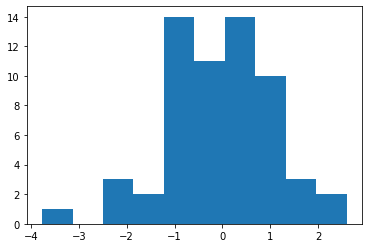

Критерий Шапиро-Уилка
statistic = 0.9763578772544861 pvalue = 0.29435381293296814
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 1.7025721478952764
выборочный коэффициент корреляции r = 0.14871392605236178
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (2.0805650739495363, 0.14918493976034156, 2.0834591090735572, 0.1542821257644679)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [453]:
errors_test(X1, errors, dl=1.55, du=1.62)

<AxesSubplot:xlabel='y', ylabel='Density'>

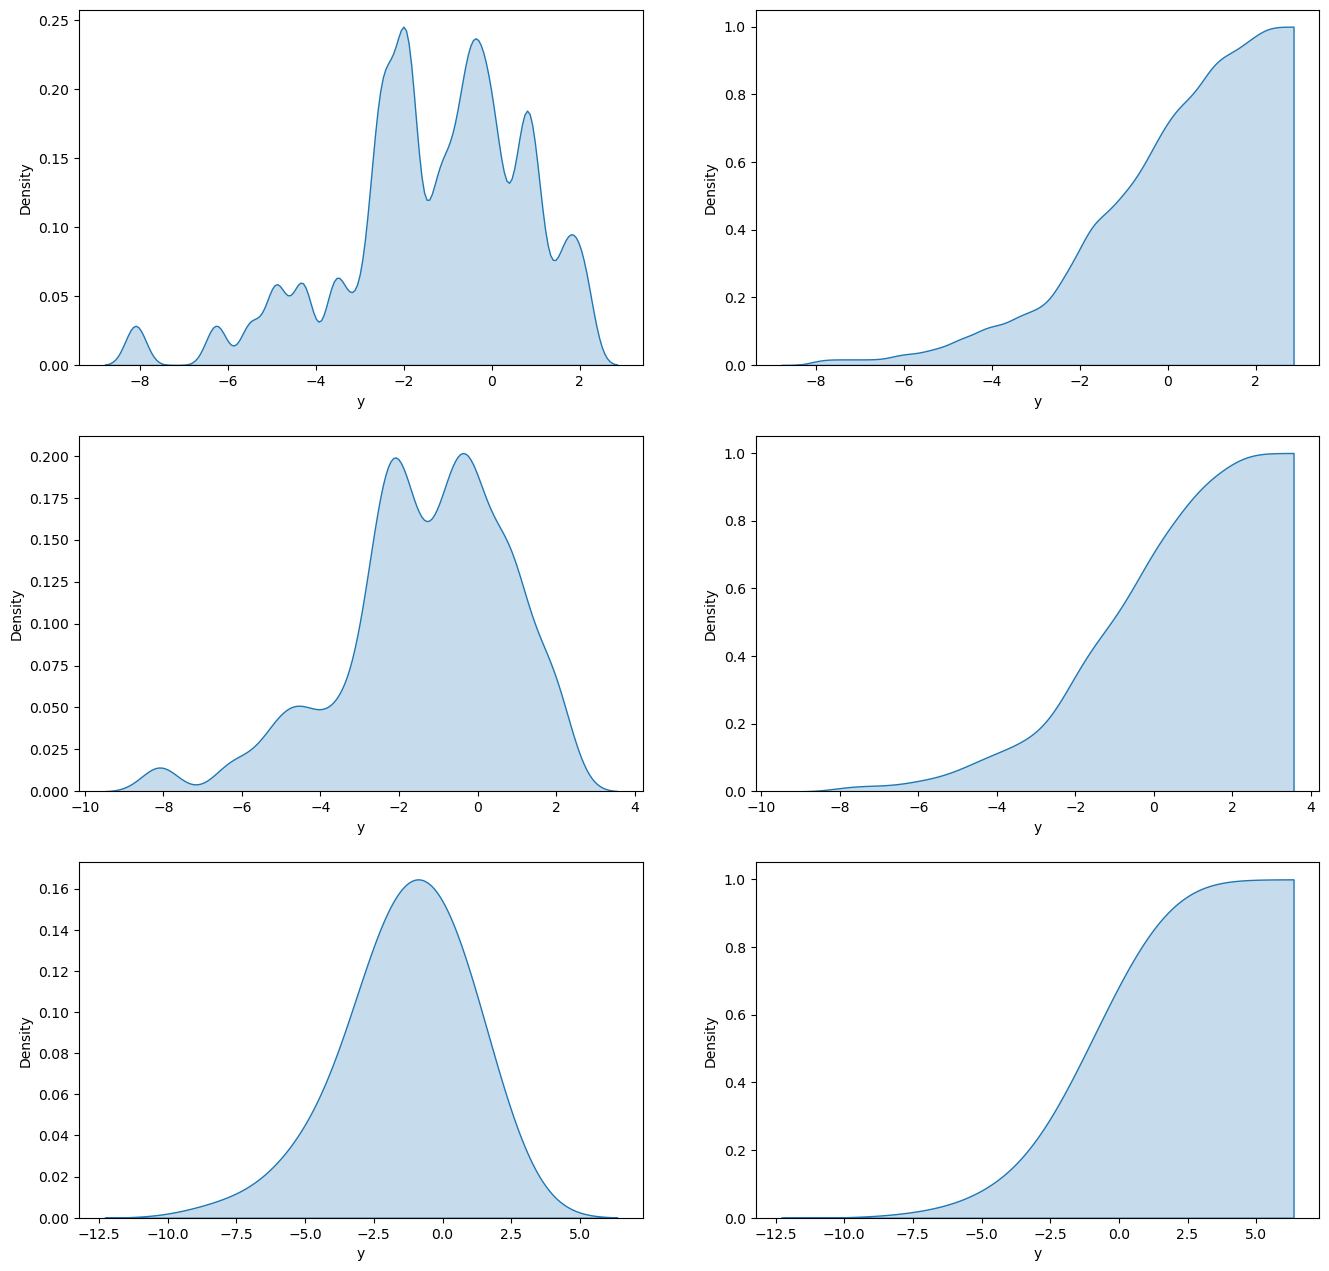

In [548]:
plt.figure(figsize=(16, 16), dpi=100)
pylab.subplot (3, 2, 1)
sns.kdeplot(y_data, fill=True, bw_adjust=0.25, palette="crest", cumulative=False)
pylab.subplot (3, 2, 2)
sns.kdeplot(y_data, shade=True, bw_adjust=0.25, palette="crest", cumulative=True)
pylab.subplot (3, 2, 3)
sns.kdeplot(y_data, shade=True, bw_adjust=0.5, palette="crest", cumulative=False)
pylab.subplot (3, 2, 4)
sns.kdeplot(y_data, shade=True, bw_adjust=0.5, palette="crest", cumulative=True)
pylab.subplot (3, 2, 5)
sns.kdeplot(y_data, shade=True, bw_adjust=1.5, palette="crest", cumulative=False)
pylab.subplot (3, 2, 6)
sns.kdeplot(y_data, shade=True, bw_adjust=1.5, palette="crest", cumulative=True)

n = 60
k = 4
coeffs: [-3.23561663 -0.43473948  3.14163499 -0.46563039]
R^2 = 0.8000624801639338
RMSE = 0.9393789222384511
VIF:
 [80.82242322795281, 4.851446632172911, 58.63003612005568, 42.09320373192414]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 1.29673371 -0.16460186 -1.89931862  0.69607758]
 [-0.16460186  0.02476928  0.22576513 -0.0800344 ]
 [-1.89931862  0.22576513  3.02437274 -1.1652067 ]
 [ 0.69607758 -0.0800344  -1.1652067   0.46609032]]
след ковариационной матрицы tr = [[4.81196606]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
A= [0 0 0 1]
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
Сумма квадратов отклонений на обучающей выборке (ridge): 53.647683943948564
Сумма квадратов отклонений на обучающей выборке: 52.945965572752435
Сумма квадратов отклонений на тестовой выборке: 33.64725629964665


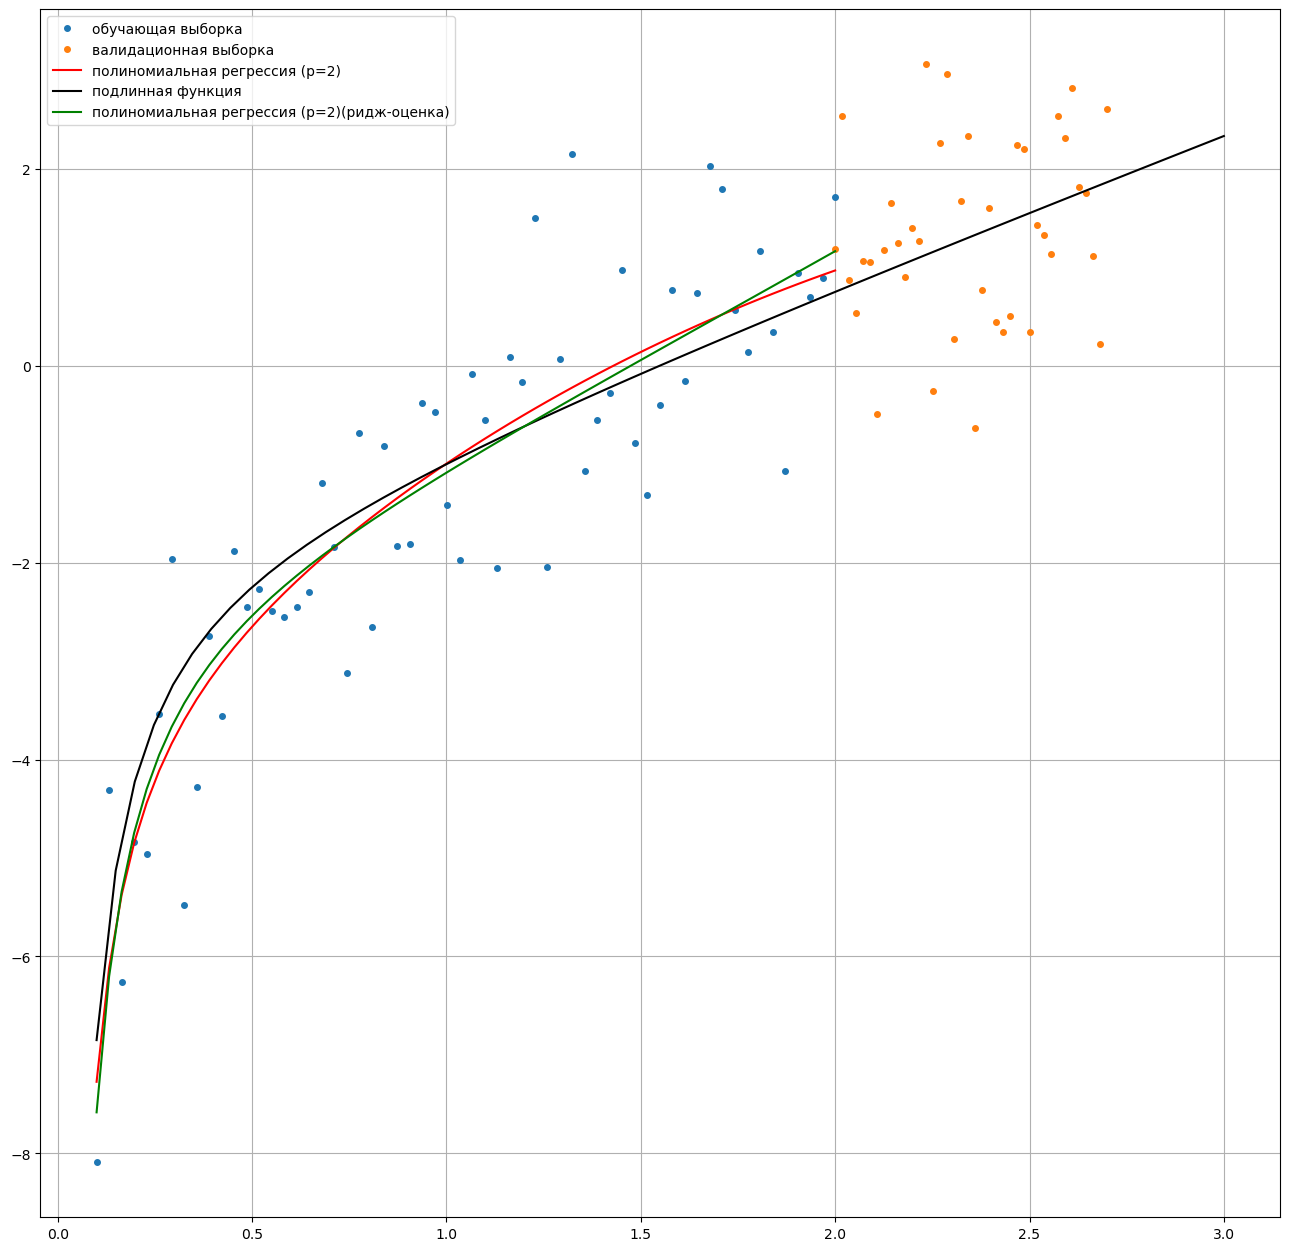

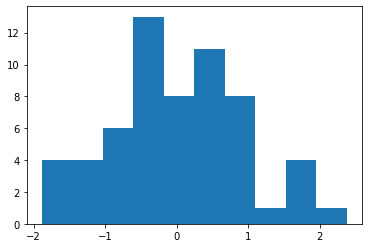

Критерий Шапиро-Уилка
statistic = 0.9862452745437622 pvalue = 0.7346039414405823
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.3710165937138172
выборочный коэффициент корреляции r = -0.18550829685690862
гопотеза о некоррелированности не пренимается и не отвергается

значение f-статистики Бройша-Пагана (1.4858845061546222, 0.6855319900229662, 0.47401401435300466, 0.7016234145403337)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [564]:
coeffs, errors, sigma_hat_2 = lr(X2, X2_test, 'полиномиальная регрессия (p=2)')
errors_test(X2, errors, dl=1.51, du=1.65)

n = 60
k = 4
coeffs: [-3.23561663 -0.43473948  3.14163499 -0.46563039]
R^2 = 0.8000624801639338
RMSE = 0.9393789222384511
VIF:
 [80.82242322795281, 4.851446632172911, 58.63003612005568, 42.09320373192414]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 1.29673371 -0.16460186 -1.89931862  0.69607758]
 [-0.16460186  0.02476928  0.22576513 -0.0800344 ]
 [-1.89931862  0.22576513  3.02437274 -1.1652067 ]
 [ 0.69607758 -0.0800344  -1.1652067   0.46609032]]
след ковариационной матрицы tr = [[4.81196606]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
A= [0 0 0 1]
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
Сумма квадратов отклонений на обучающей выборке (ridge): 53.647683943948564
Сумма квадратов отклонений на обучающей выборке: 52.945965572752435
Сумма квадратов отклонений на тестовой выборке: 33.64725629964665


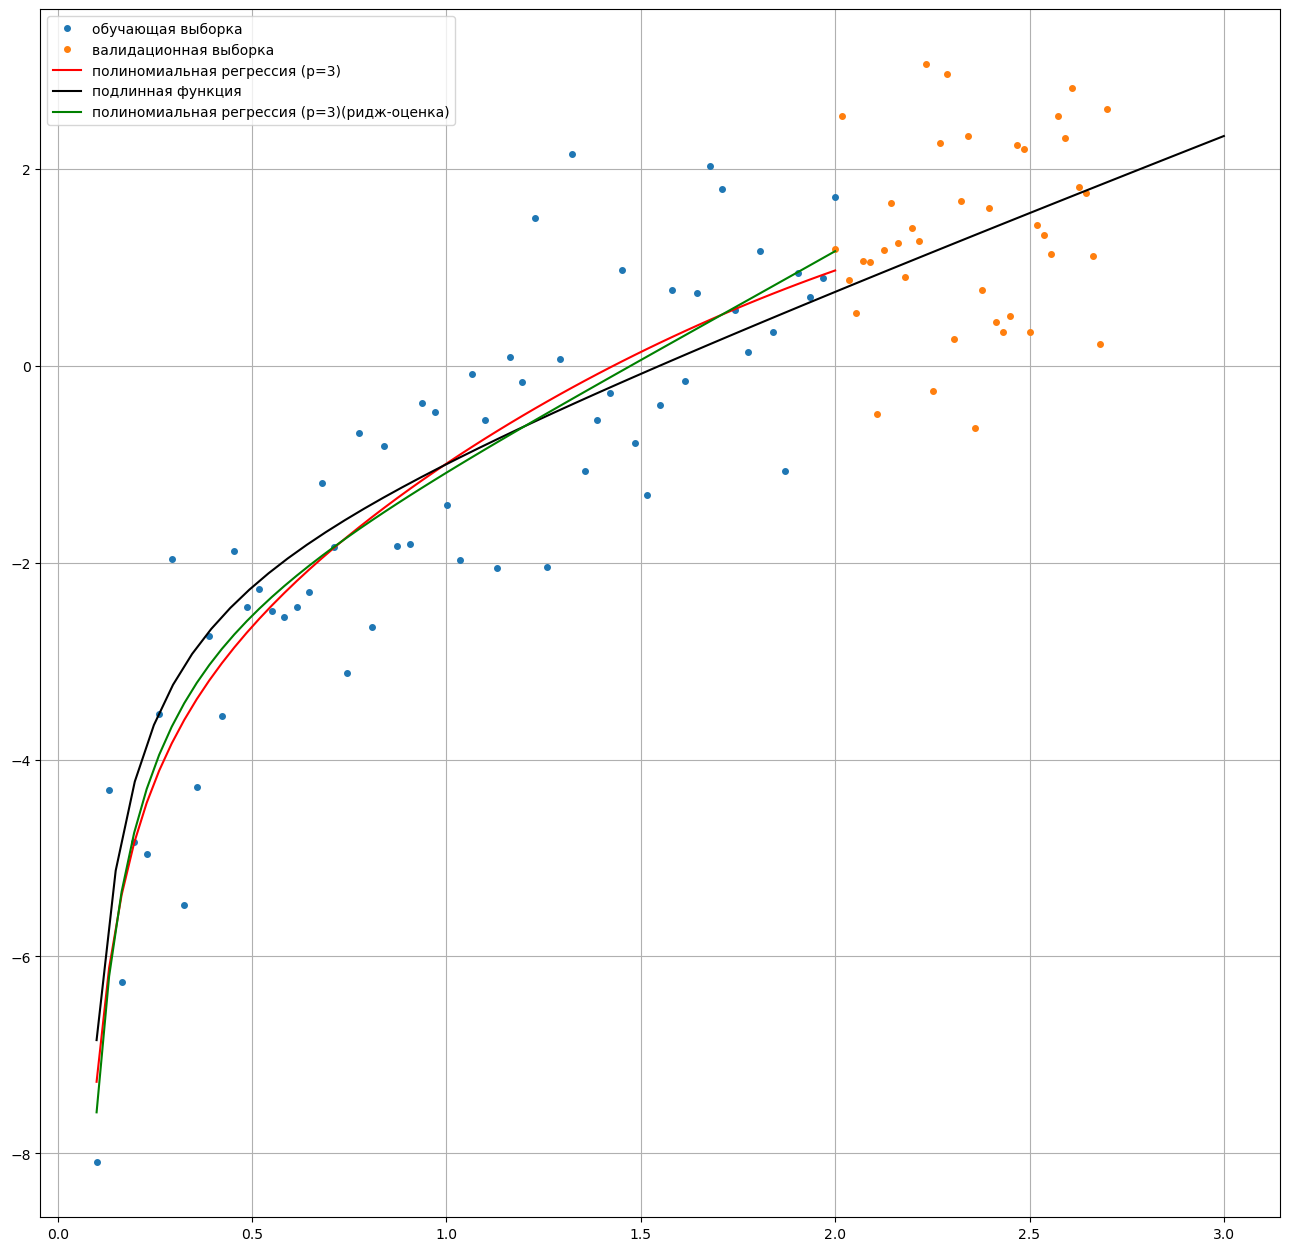

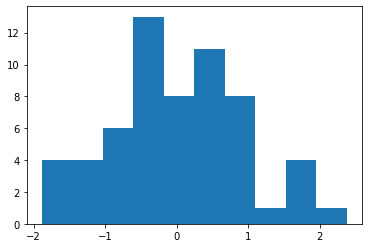

Критерий Шапиро-Уилка
statistic = 0.9862452745437622 pvalue = 0.7346039414405823
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.3710165937138172
выборочный коэффициент корреляции r = -0.18550829685690862
гопотеза о некоррелированности не пренимается и не отвергается

значение f-статистики Бройша-Пагана (1.4858845061546222, 0.6855319900229662, 0.47401401435300466, 0.7016234145403337)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [495]:
coeffs, errors, sigma_hat_2 = lr(X3, X3_test, 'полиномиальная регрессия (p=3)')
errors_test(X3, errors, dl=1.48, du=1.69)

n = 60
k = 5
coeffs: [-2.66735902 -0.48577401  1.57195375  0.96543386 -0.40195609]
R^2 = 0.8003579323591128
RMSE = 0.9386845948978474
VIF:
 [328.4596829561021, 11.128134623881984, 646.3252748073695, 2317.7383845727145, 673.6887534938277]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[  5.35954215  -0.53029689 -13.09326744  10.88388223  -2.85821539]
 [ -0.53029689   0.05778182   1.23201918  -0.99528697   0.25669289]
 [-13.09326744   1.23201918  33.90728226 -29.29379023   7.89516398]
 [ 10.88388223  -0.99528697 -29.29379023  26.1005228   -7.19794987]
 [ -2.85821539   0.25669289   7.89516398  -7.19794987   2.02175392]]
след ковариационной матрицы tr = [[67.44688295]]
гипотеза H_0: theta_i=0 НЕ принилась на уровне alpha = 0.05
A= [0 0 0 0 1]
гипотеза H_0: theta_n=0 НЕ принилась на уровне alpha = 0.05
Сумма квадратов отклонений на обучающей выборке (ridge): 52.98267376639882
Сумма квадратов отклонений на обучающей выборке: 52.867726121912156
Сумма квадратов отклонений

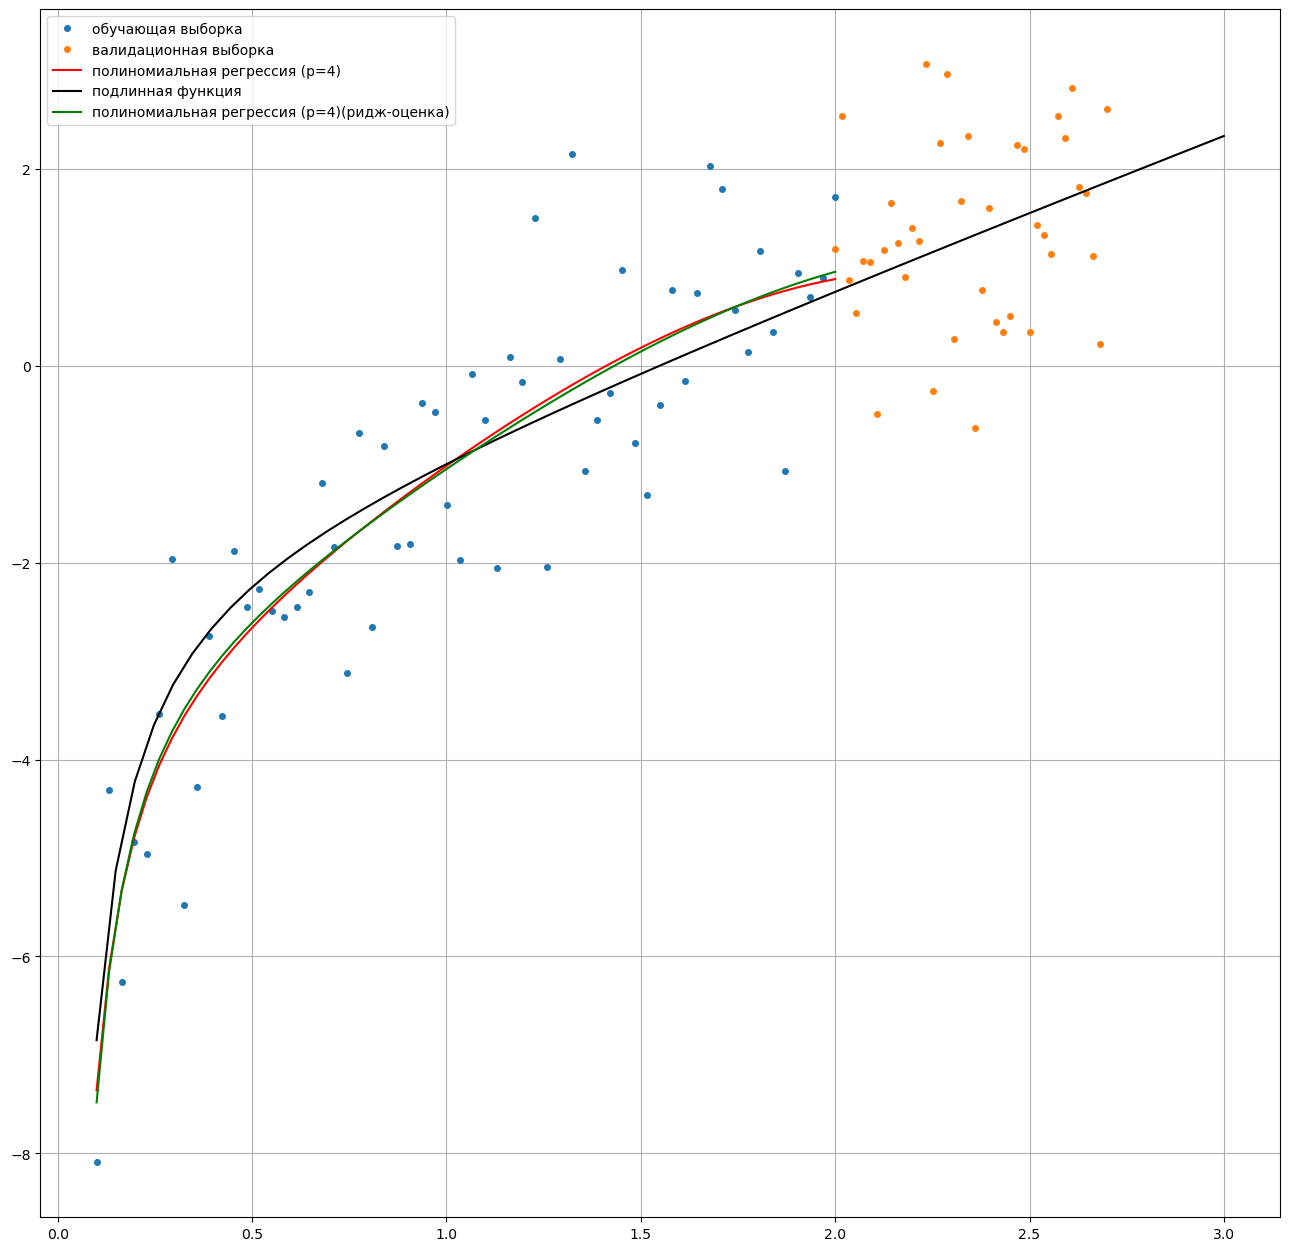

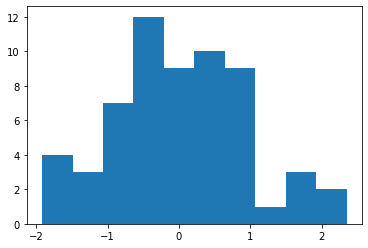

Критерий Шапиро-Уилка
statistic = 0.9887374043464661 pvalue = 0.8548944592475891
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.3703493231235533
выборочный коэффициент корреляции r = -0.18517466156177664
гопотеза о некоррелированности не пренимается и не отвергается

значение f-статистики Бройша-Пагана (4.12490283644122, 0.3893659212540362, 1.0150749954857772, 0.40768871508634735)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [496]:
coeffs, errors, sigma_hat_2 = lr(X4, X4_test, 'полиномиальная регрессия (p=4)')
errors_test(X4, errors, dl=1.44, du=1.73)

n = 60
k = 6
coeffs: [-1.1002282  -0.60159779 -4.53687593 10.12924053 -6.09342914  1.23260277]
R^2 = 0.8010034827736869
RMSE = 0.9371657294462359
VIF:
 [1190.4313951237043, 25.924489986338692, 4720.149871470146, 45024.35620501253, 62490.7714677316, 10526.039218575997]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 1.97270116e+01 -1.59426001e+00 -6.89776202e+01  9.45791745e+01
  -5.47790731e+01  1.12348643e+01]
 [-1.59426001e+00  1.36706877e-01  5.36644603e+00 -7.18402589e+00
   4.09477648e+00 -8.30348310e-01]
 [-6.89776202e+01  5.36644603e+00  2.51483176e+02 -3.55341732e+02
   2.10237204e+02 -4.37946032e+01]
 [ 9.45791745e+01 -7.18402589e+00 -3.55341732e+02  5.14924566e+02
  -3.10657284e+02  6.56959350e+01]
 [-5.47790731e+01  4.09477648e+00  2.10237204e+02 -3.10657284e+02
   1.90456671e+02 -4.08025461e+01]
 [ 1.12348643e+01 -8.30348310e-01 -4.37946032e+01  6.56959350e+01
  -4.08025461e+01  8.83661060e+00]]
след ковариационной матрицы tr = [[985.56474292]]
гипоте

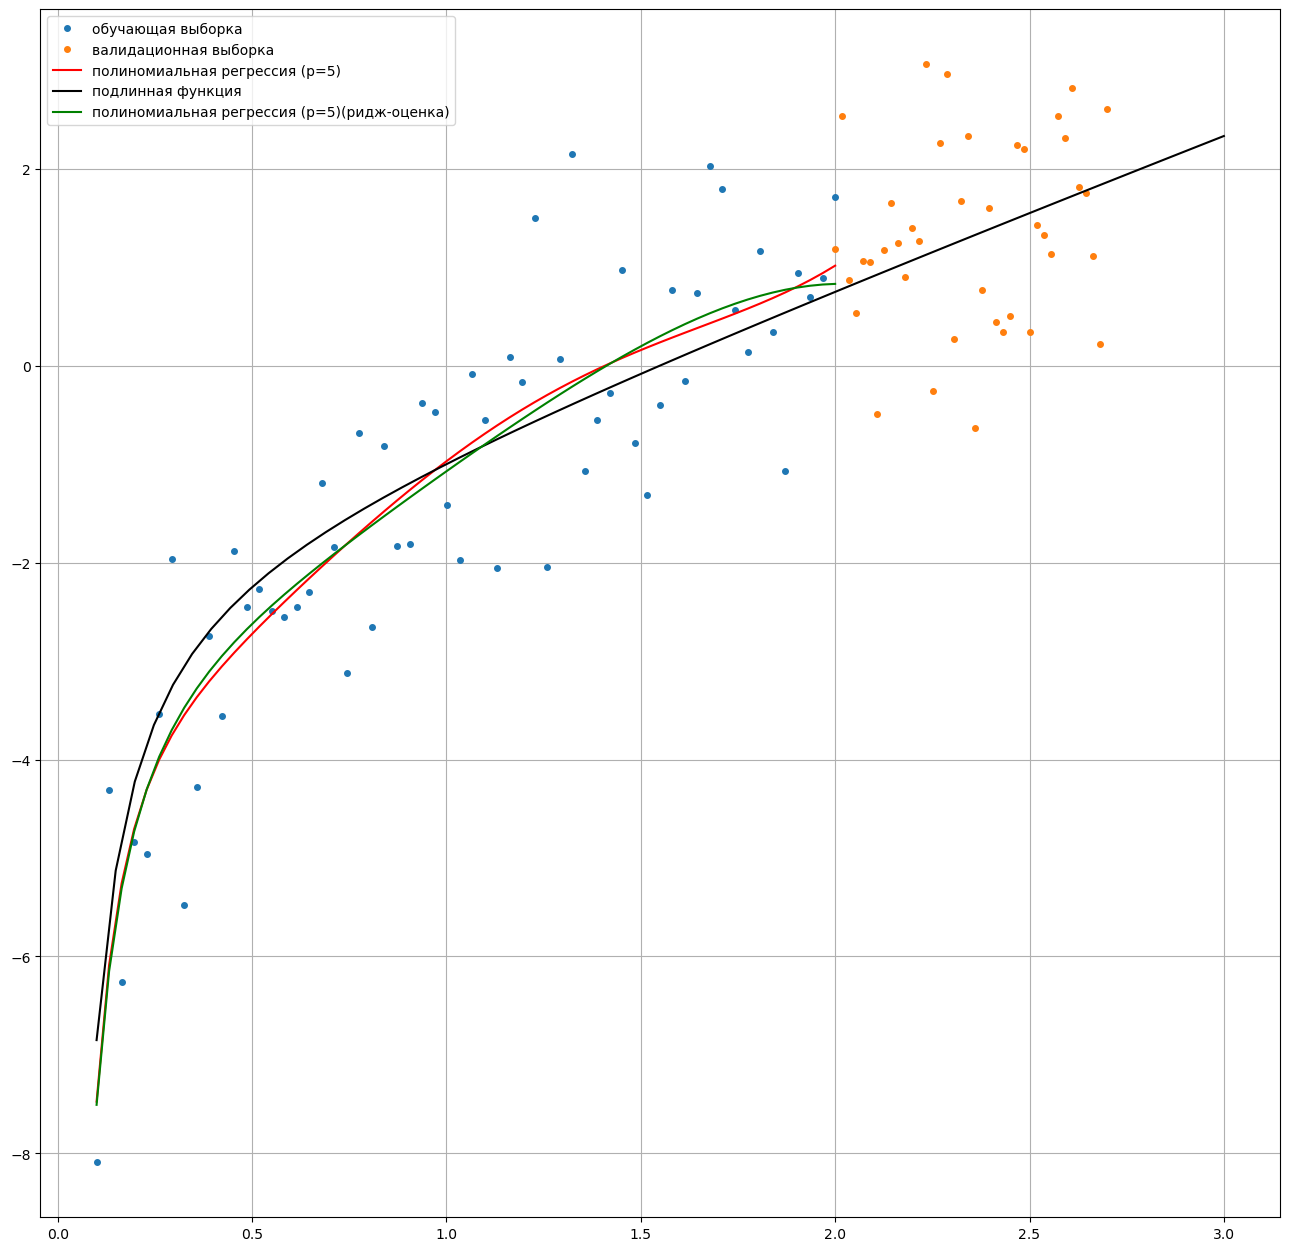

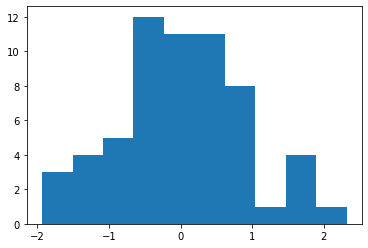

Критерий Шапиро-Уилка
statistic = 0.9885932207107544 pvalue = 0.8485515713691711
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.3677141174645127
выборочный коэффициент корреляции r = -0.18385705873225633
гопотеза о некоррелированности не пренимается и не отвергается

значение f-статистики Бройша-Пагана (5.593124443298656, 0.3478424640546068, 1.1102593811819301, 0.3658878468772996)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [497]:
coeffs, errors, sigma_hat_2 = lr(X5, X5_test, 'полиномиальная регрессия (p=5)')
errors_test(X5, errors, dl=1.41, du=1.77)

n = 60
k = 7
coeffs: [-1.89847021 -0.55136505 -0.50463717  1.50011236  2.60629489 -2.85373439
  0.7202337 ]
R^2 = 0.8010543625204519
RMSE = 0.9370459137732128
VIF:
 [4027.9380752215575, 61.2361583779068, 27239.922240239892, 525490.0733852194, 1895038.5799924934, 1478344.4265363023, 165367.36369826848]
Матрица H^T * H мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 6.80144489e+01 -4.63964400e+00 -3.12314885e+02  6.14323113e+02
  -5.78005402e+02  2.56723909e+02 -4.32308872e+01]
 [-4.63964400e+00  3.29040646e-01  2.06989263e+01 -3.99144770e+01
   3.70332805e+01 -1.62811199e+01  2.72048558e+00]
 [-3.12314885e+02  2.06989263e+01  1.47883759e+03 -2.97845343e+03
   2.85200107e+03 -1.28361189e+03  2.18376454e+02]
 [ 6.14323113e+02 -3.99144770e+01 -2.97845343e+03  6.12381534e+03
  -5.96148012e+03  2.71841545e+03 -4.67333044e+02]
 [-5.78005402e+02  3.70332805e+01  2.85200107e+03 -5.96148012e+03
   5.88518108e+03 -2.71474183e+03  4.71156348e+02]
 [ 2.56723909e+02 -1.62811199e+01 -1.2836118

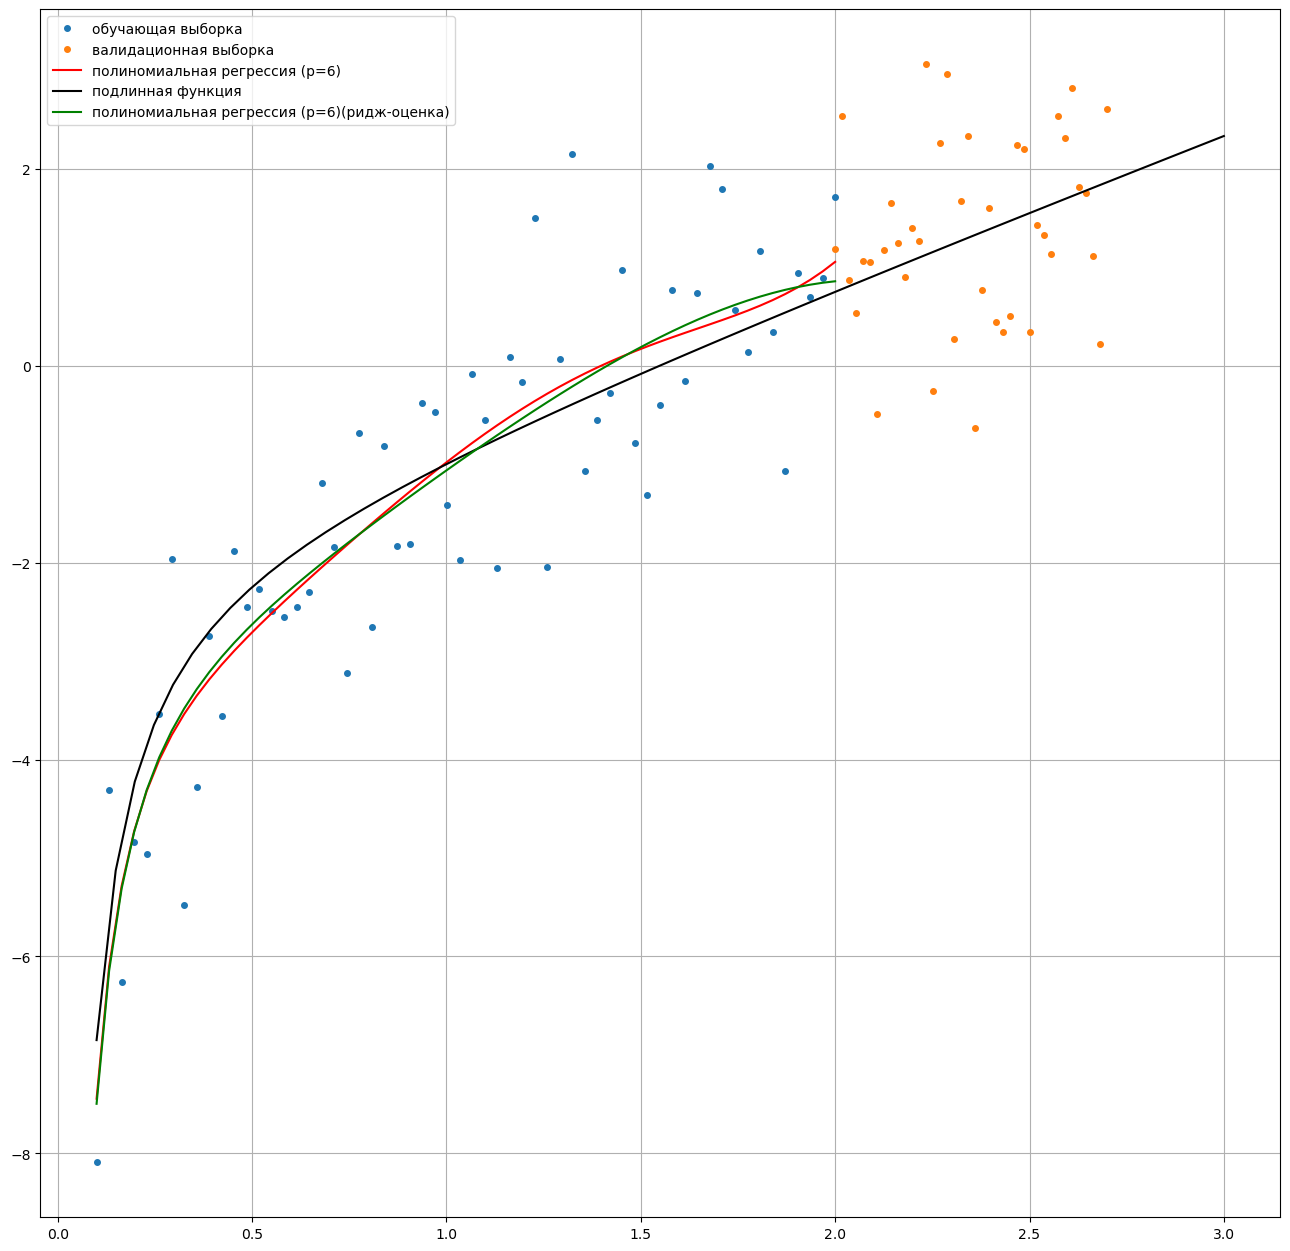

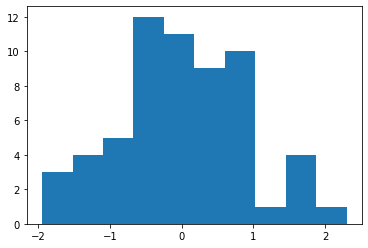

Критерий Шапиро-Уилка
statistic = 0.9883717894554138 pvalue = 0.8386184573173523
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 2.370607003427117
выборочный коэффициент корреляции r = -0.18530350171355847
гопотеза о некоррелированности не пренимается и не отвергается

значение f-статистики Бройша-Пагана (5.891091327563808, 0.4355001557051297, 0.9617265376484879, 0.460005562916014)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [498]:
coeffs, errors, sigma_hat_2 = lr(X6, X6_test, 'полиномиальная регрессия (p=6)')
errors_test(X6, errors, dl=1.37, du=1.81)

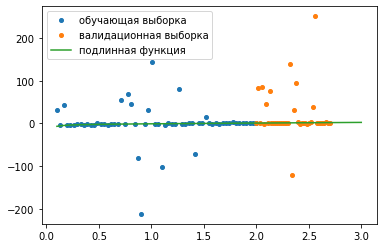

In [672]:
def gen_sample(n, h, delta, sigma, big_sigma):
    u_rand = [random.normalvariate(0, sigma**2) for _ in range(n)]
    v_rand = [random.normalvariate(0, big_sigma**2) for _ in range(n)]
    w_rand = [random.uniform(0.0, 1.0) for _ in range(n)]

    X = [law_fun(h[i]) + u_rand[i] if w_rand[i] > delta else v_rand[i] for i in range(n)]
    return np.array(X)

sample_size = 60
big_sigma = 10.0 * sigma
delta = 0.08
h_data_tukey = np.linspace(left_bound, right_bound, sample_size)
# y_data_tukey = np.array([law_fun(i) + normalvariate(0, sigma) for i in h_data])
y_data_tukey = gen_sample(sample_size, h_data_tukey, delta=0.3, sigma=sigma, big_sigma=big_sigma)

test_sample_size = 40
shift = right_bound - left_bound
h_data_test_tukey = np.linspace(left_bound + shift, right_bound + 0.7, test_sample_size)
# y_data_test_tukey = np.array([law_fun(i) + normalvariate(0, sigma) for i in h_data_test])
y_data_test_tukey = gen_sample(test_sample_size, h_data_test_tukey, delta=0.3, sigma=sigma, big_sigma=big_sigma)

plt.plot(h_data_tukey, y_data_tukey, 'o', label='обучающая выборка', markersize=4)
plt.plot(h_data_test_tukey, y_data_test_tukey, 'o', label='валидационная выборка', markersize=4)
plt.plot(h_law, y_law, '-', label='подлинная функция')
plt.legend()
plt.show()

n = 60
k = 2
coeffs: [16.58895988 -9.02195931]
R^2 = 0.0038028909747430673
RMSE = 81.4363789462835
VIF:
 [4.544661913627899, 0.9999999999999998]
Матрица H^T * H не мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 528.76613673 -392.77837891]
 [-392.77837891  374.07464658]]
след ковариационной матрицы tr = [[902.84078331]]
гипотеза H_0: theta_i=0 принилась на уровне alpha = 0.005
A= [0 1]
гипотеза H_0: theta_n=0 принилась на уровне alpha = 0.005
min modules coeffs: [-4.12597722  2.69599383]
Сумма квадратов отклонений на тестовой выборке (МНМ): 132673.39229390415
Сумма квадратов отклонений на обучающей выборке: 397913.0289529612
Сумма квадратов отклонений на тестовой выборке: 134270.98366391863


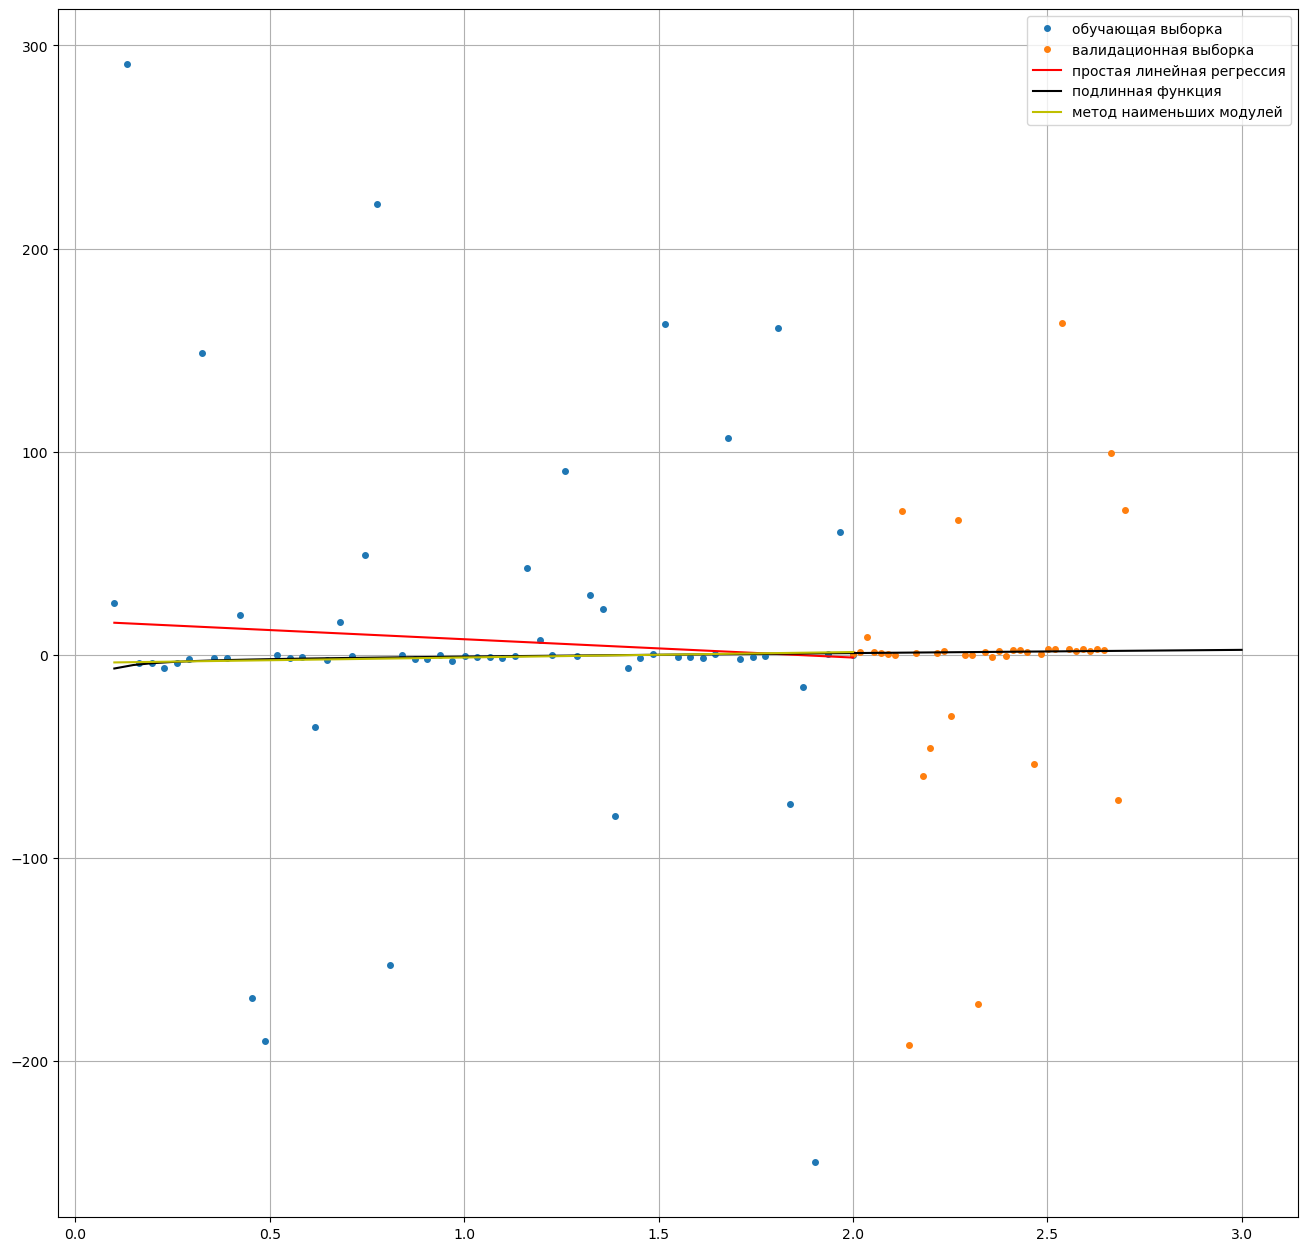

log_likehood = -350.6644361623097
AIC = 8.917604139000979
AIC_c = 9.128130454790453
BIC = 709.5175614490636


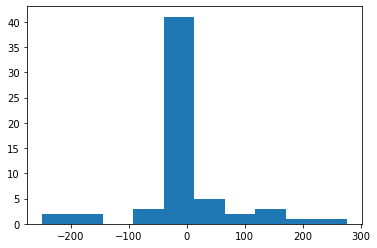

Критерий Шапиро-Уилка
statistic = 0.7875881791114807 pvalue = 6.709592526021879e-08
распределение ошибок нормальное на уровне значимости 0.05

значение статистики Дарбина-Уотсона: 2.000959134152253
выборочный коэффициент корреляции r = -0.00047956707612639704
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (3.7499213612269733, 0.2897650979883054, 1.2444166082994066, 0.3023220847957896)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [567]:
coeffs, errors, sigma_hat_2 = lr(X1, X1_test, 'простая линейная регрессия', show_method_min_module=True, y_data=y_data_tukey, y_data_test=y_data_test_tukey)
log_likehood = -len(y_data_tukey) / 2.0 * (1 + np.log(2 * np.pi) + np.log(sigma_hat_2))
k = 2
AIC = 2 * k / len(y_data_tukey) + np.log(sigma_hat_2)
AIC_c = AIC + 2 * k * (k + 1) / (len(y_data_tukey) - k - 1)
BIC = k * np.log(len(y_data_tukey)) - 2 * log_likehood
print('log_likehood =', log_likehood)
print('AIC =', AIC)
print('AIC_c =', AIC_c)
print('BIC =', BIC)
# conf_int = t.interval(0.8, df=len(y_data)-2, loc=coeffs[0], scale=coeffs[1])
# print(conf_int)
# plt.plot(conf_int[0], conf_int[1])
errors_test(X2, errors, dl=1.51, du=1.65)

In [673]:
df = open('data_tukey.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x', 'y']])
    for i in range(len(h_data)):
        if abs(y_data_tukey[i] - law_fun(h_data_tukey[i])) < 3 * sigma:
            writer.writerows([[
                str(1.0),
                str(h_data[i]),
                str(y_data[i])]])

In [674]:
df = pd.read_csv('data_tukey.csv')
y_data_tukey = df['y']
X_tukey = df[['intercept', 'x']]

In [675]:
df = open('data_tukey_test.csv', 'w', newline='')
with df:
    writer = csv.writer(df)
    writer.writerows([['intercept', 'x', 'y']])
    for i in range(len(h_data_test)):
        if abs(y_data_test_tukey[i] - law_fun(h_data_test_tukey[i])) < 3 * sigma:
            writer.writerows([[
                str(1.0),
                str(h_data_test[i]),
                str(y_data_test[i])]])

In [676]:
df = pd.read_csv('data_tukey_test.csv')
y_data_test_tukey = df['y']
X_test_tukey = df[['intercept', 'x']]

n = 47
k = 2
coeffs: [-4.24072404  2.9188941 ]
R^2 = 0.7440450286738831
RMSE = 1.0043545233853262
VIF:
 [4.47433379543705, 1.0]
Матрица H^T * H не мультиколлинеарна
оценка ковариационной матрицы K:
 [[ 0.10257695 -0.07284012]
 [-0.07284012  0.06661137]]
след ковариационной матрицы tr = [[0.16918832]]
гипотеза H_0: theta_i=0 принилась на уровне alpha = 0.005
A= [0 1]
гипотеза H_0: theta_n=0 принилась на уровне alpha = 0.005
min modules coeffs: [-4.12597722  2.69599383]
Сумма квадратов отклонений на тестовой выборке (МНМ): 51.50444165573782
Сумма квадратов отклонений на обучающей выборке: 47.41021640629459
Сумма квадратов отклонений на тестовой выборке: 79.57642697695123


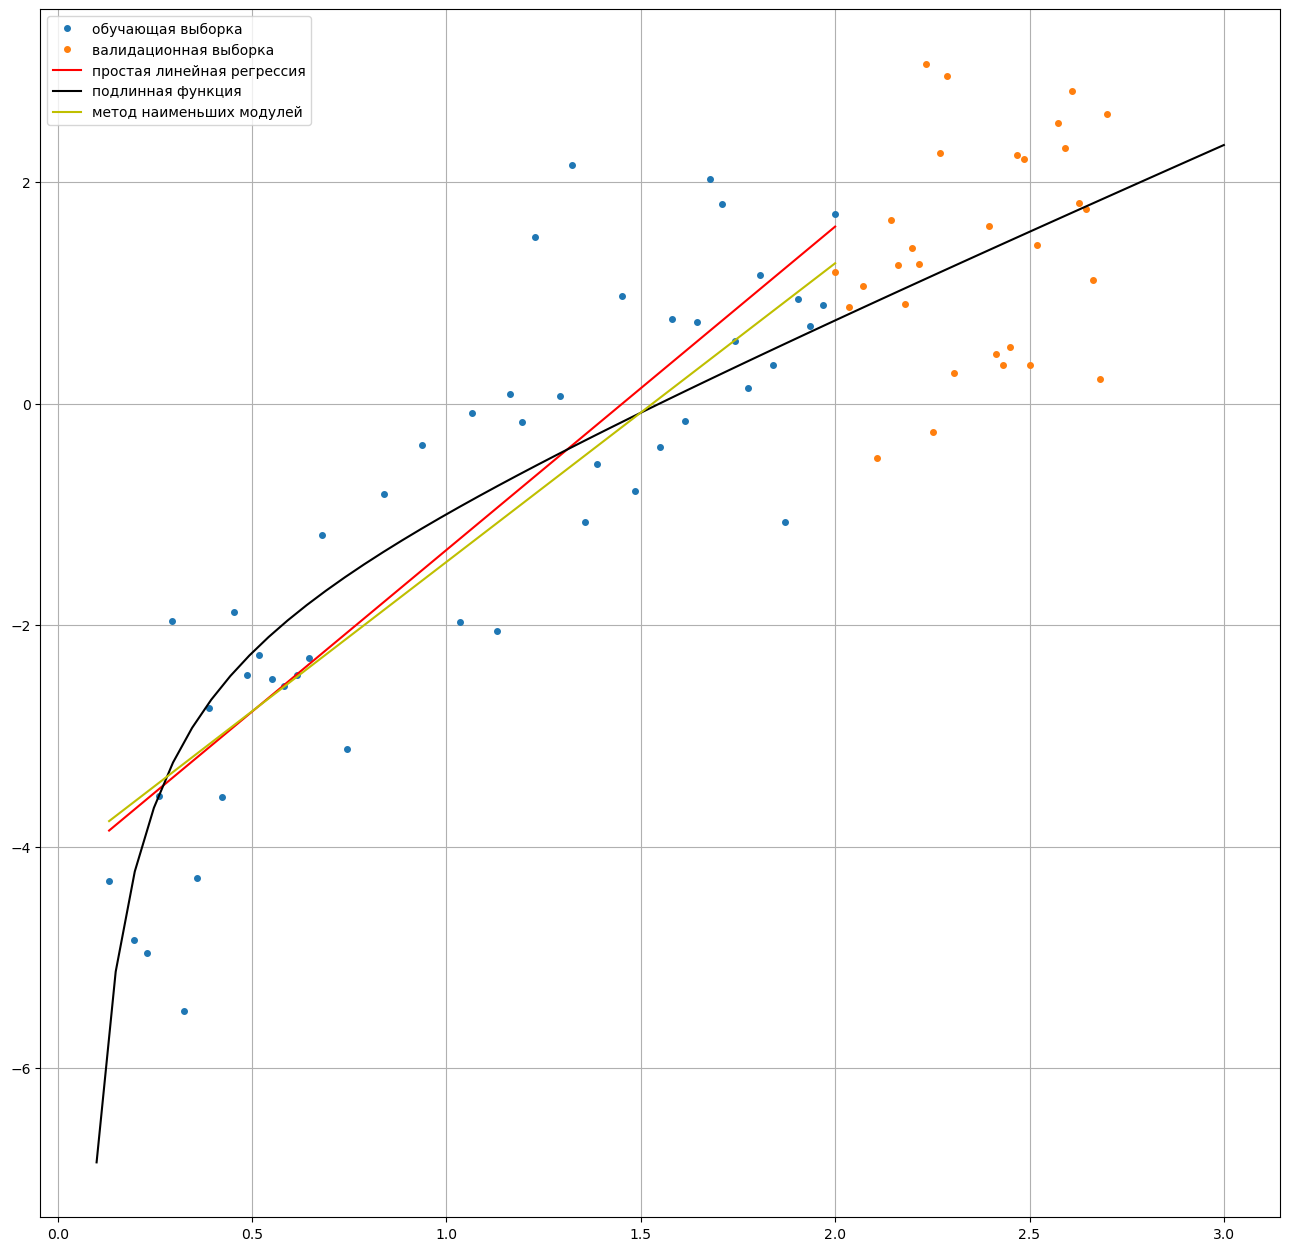

log_likehood = -68.44434158818561
AIC = 0.15975449053472313
AIC_c = 0.43248176326199583
BIC = 144.58897837979134


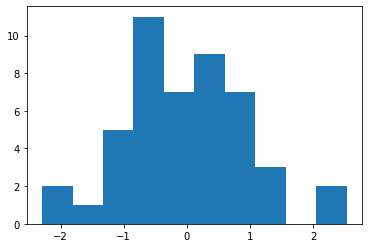

Критерий Шапиро-Уилка
statistic = 0.9823982119560242 pvalue = 0.6931416988372803
гипотезу о нормальном распределении ошибок на уровне 0.05 не удается принять

значение статистики Дарбина-Уотсона: 1.9043003594436232
выборочный коэффициент корреляции r = 0.047849820278188404
гопотеза о некоррелированности принимается

значение f-статистики Бройша-Пагана (0.007322972738314504, 0.9318047737710263, 0.00701244947235249, 0.9336342816028629)
гипотеза о гетероскедостичности принимается на уровне значимости 0.05


In [681]:
coeffs, errors, sigma_hat_2 = lr(X_tukey, X_test_tukey, 'простая линейная регрессия', show_method_min_module=True, y_data=y_data_tukey, y_data_test=y_data_test_tukey, X1=X_tukey)
log_likehood = -len(y_data_tukey) / 2.0 * (1 + np.log(2 * np.pi) + np.log(sigma_hat_2))
k = 2
AIC = 2 * k / len(y_data_tukey) + np.log(sigma_hat_2)
AIC_c = AIC + 2 * k * (k + 1) / (len(y_data_tukey) - k - 1)
BIC = k * np.log(len(y_data_tukey)) - 2 * log_likehood
print('log_likehood =', log_likehood)
print('AIC =', AIC)
print('AIC_c =', AIC_c)
print('BIC =', BIC)
# conf_int = t.interval(0.8, df=len(y_data)-2, loc=coeffs[0], scale=coeffs[1])
# print(conf_int)
# plt.plot(conf_int[0], conf_int[1])
errors_test(X_tukey, errors, dl=1.51, du=1.65)